# Titanic Dataset (somente análise dos dados)

## Carregando os dados

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import random as rnd

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [32]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_all = [df_train, df_test]

In [33]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**PassengerId** consiste somente no número de identificação do passageiro (provavelmente pouco utilizável).

**Survived** consiste em uma classificação binária (0 ou 1) para dizer se o passageiro sobreviveu (1) ou morreu (0).

**Pclass** consiste na variável que diz em que classe o passageiro estava, divida em 3 partes (1 classe, 2 classe, 3 classe).

**Age** consiste na idade do passageiro.

**Parch** consiste no número de irmão e filhos de cada passageiros que estavama a bordo.

**Fare** consiste na taxa/preço pago pela viagem.

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualizing the data

### Pclass feature

Observando quantos sobreviventos temos por classe.

In [36]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending = False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Conseguimos observar que pessoa tanto da primeira quanto da segunda classe possuem uma porcentagem de sobrevivência muito maior com relação a terceira classe.

### Sex 


In [37]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending = False)

,Survived
Sex,
female,0.742038
male,0.188908


### Correlação entre as features sex e pclass

In [38]:
df_train[['Pclass','Sex','Survived']].groupby(['Sex','Pclass'], as_index=True).mean().sort_values(by='Survived', ascending = False)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

Observamos que 90% mulheres que encontram-se na primeira e segunda classe sobrevivem, enquanto apenas 36% dos homens da primeira classe sobrevivem.

### Embarked

In [39]:
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending = False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


Passageiros que embarcaram em Cherbourh (C) sobrevivem, praticamente, 20% a mais do que pessas que embarcaram nas outras 2 cidades.

In [40]:
df_train[['Sex', 'Embarked','Survived']].groupby(['Sex', 'Embarked'], as_index=True).mean().sort_values(by='Survived', ascending = False)

# Análise da quantidade de homens e mulheres de acordo com o local de embarque para termos uma melhor visão da nossa predição

Survived
Sex    Embarked          
female C         0.876712
       Q         0.750000
       S         0.689655
male   C         0.305263
       S         0.174603
       Q         0.073171

### Correlação entre as features Sibsp e Survived

<AxesSubplot: title={'center': 'Survival rate by Number of Siblings and Spouses in ship'}, xlabel='SibSp', ylabel='Survived'>

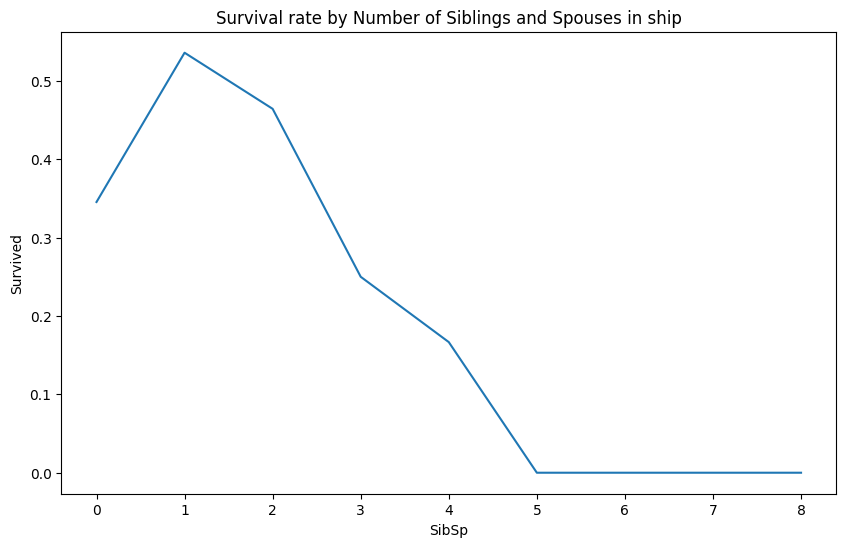

In [41]:
sib_sp = df_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=True).mean().sort_values(by='Survived', ascending=False)

plt.figure(figsize=(10,6))
plt.title("Survival rate by Number of Siblings and Spouses in ship")
sns.lineplot(data=sib_sp, x='SibSp', y='Survived')

<AxesSubplot: title={'center': 'Survival rate by Number of Parents and Children in ship'}, xlabel='Parch', ylabel='Survived'>

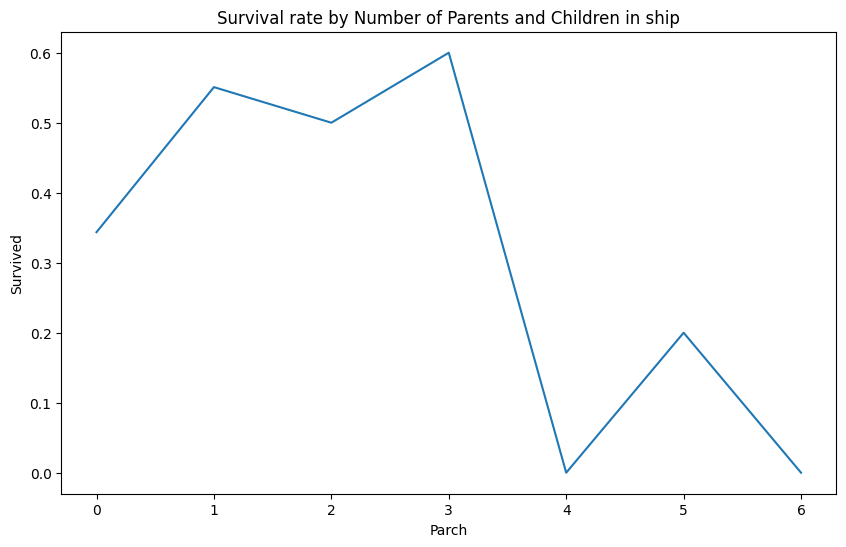

In [42]:
parch = df_train[["Parch", "Survived"]].groupby(['Parch'], as_index=True).mean().sort_values(by='Survived', ascending=False)

plt.figure(figsize=(10,6))
plt.title("Survival rate by Number of Parents and Children in ship")
sns.lineplot(data=parch, x='Parch', y='Survived')

In [ ]:
for dataset in df_all:
    dataset['Family_Size'] = dataset['SibSp'] + dataset['Parch'] + 1

family_size = df_train[['FamilySize','Sex', 'Survived']].groupby(['Sex','FamilySize'], as_index=True).mean()

plt.figure(figsize=(10,6))
plt.title("Survival rate by Family Size in ship")
sns.lineplot(data=family_size, x='FamilySize', y='Survived')

In [ ]:
df_train[['FamilySize', 'PassengerId']].groupby(['FamilySize'], as_index=True).count()

In [44]:
# Retirando as colunas que possuem pouca correlação com a variável Survived

df_train = df_train.drop(['Parch', 'SibSp'], axis=1)
df_test = df_test.drop(['Parch', 'SibSp'], axis=1)
df_all = [df_train, df_test]

df_train.head(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_Size


### Age



In [45]:
for dataset in df_all:
    dataset['CategoricalAge'] = pd.qcut(df_train['Age'], 5)

categorical_age = df_train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=True).mean()
print(categorical_age)

                Survived
CategoricalAge          
(0.419, 19.0]   0.481707
(19.0, 25.0]    0.328467
(25.0, 31.8]    0.393701
(31.8, 41.0]    0.437500
(41.0, 80.0]    0.373239


In [46]:
for dataset in df_all:
    dataset['CategoricalAge'] = pd.qcut(df_train['Age'], 13)

df_train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=True).mean()

,Survived
CategoricalAge,
"(0.419, 9.0]",0.612903
"(9.0, 17.0]",0.450980
"(17.0, 20.0]",0.318182
"(20.0, 22.0]",0.307692
"(22.0, 24.0]",0.434783
"(24.0, 27.0]",0.383333
"(27.0, 29.923]",0.319149
"(29.923, 32.0]",0.435484
"(32.0, 35.0]",0.470588


<AxesSubplot: title={'center': 'Survival rate by Age (in categories)'}, xlabel='Age Categories', ylabel='Survival rate'>

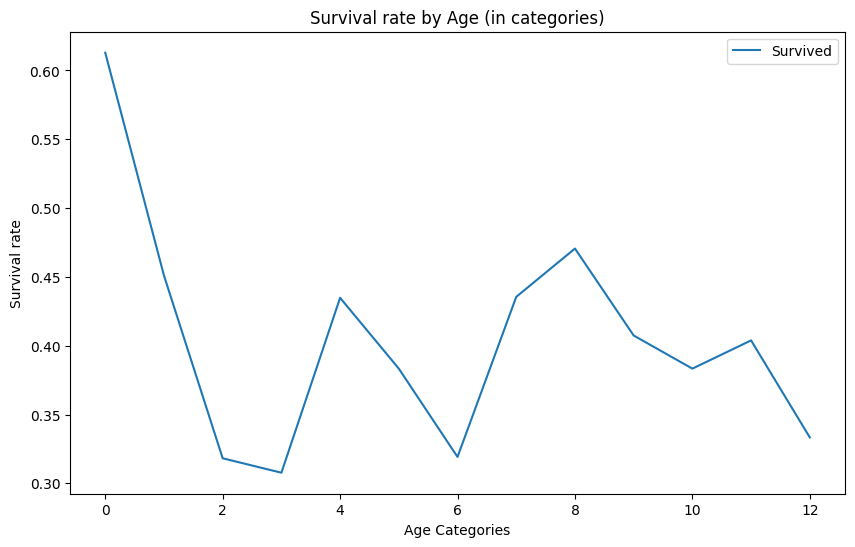

In [47]:
categorical_age = df_train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean()

plt.figure(figsize=(10,6))
plt.title("Survival rate by Age (in categories)")
plt.xlabel("Age Categories")
plt.ylabel("Survival rate")
sns.lineplot(data=categorical_age)

A partir do gráfico registrado acima, podemos ver que crianças possuem uma taxa altíssima de sobrevivência, ou seja, a probabilidade do passageiro sobreviver cresce linearmente com o decrescimento da sua idade

In [48]:
df_train = df_train.drop(['Ticket'], axis=1)
df_test = df_test.drop(['Ticket'], axis=1)
df_all = [df_train, df_test]

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family_Size,CategoricalAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,NaN,S,2,"(20.0, 22.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,2,"(35.0, 39.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,NaN,S,1,"(24.0, 27.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S,2,"(32.0, 35.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,NaN,S,1,"(32.0, 35.0]"


### Cabin

In [49]:
cabin_list = list(df_train['Cabin'].unique())
cabin_list

[nan,
 'C85',
 'C123',
 'E46',
 'G6',
 'C103',
 'D56',
 'A6',
 'C23 C25 C27',
 'B78',
 'D33',
 'B30',
 'C52',
 'B28',
 'C83',
 'F33',
 'F G73',
 'E31',
 'A5',
 'D10 D12',
 'D26',
 'C110',
 'B58 B60',
 'E101',
 'F E69',
 'D47',
 'B86',
 'F2',
 'C2',
 'E33',
 'B19',
 'A7',
 'C49',
 'F4',
 'A32',
 'B4',
 'B80',
 'A31',
 'D36',
 'D15',
 'C93',
 'C78',
 'D35',
 'C87',
 'B77',
 'E67',
 'B94',
 'C125',
 'C99',
 'C118',
 'D7',
 'A19',
 'B49',
 'D',
 'C22 C26',
 'C106',
 'C65',
 'E36',
 'C54',
 'B57 B59 B63 B66',
 'C7',
 'E34',
 'C32',
 'B18',
 'C124',
 'C91',
 'E40',
 'T',
 'C128',
 'D37',
 'B35',
 'E50',
 'C82',
 'B96 B98',
 'E10',
 'E44',
 'A34',
 'C104',
 'C111',
 'C92',
 'E38',
 'D21',
 'E12',
 'E63',
 'A14',
 'B37',
 'C30',
 'D20',
 'B79',
 'E25',
 'D46',
 'B73',
 'C95',
 'B38',
 'B39',
 'B22',
 'C86',
 'C70',
 'A16',
 'C101',
 'C68',
 'A10',
 'E68',
 'B41',
 'A20',
 'D19',
 'D50',
 'D9',
 'A23',
 'B50',
 'A26',
 'D48',
 'E58',
 'C126',
 'B71',
 'B51 B53 B55',
 'D49',
 'B5',
 'B20',
 'F G

In [50]:
for dataset in df_all:
    dataset['HasCabin'] = 1
    dataset.loc[dataset['Cabin'].isnull(), 'HasCabin'] = 0

df_train[['HasCabin', 'Survived']].groupby(['HasCabin'], as_index=True).mean()

,Survived
HasCabin,
0,0.299854
1,0.666667


Com isso, observamos que a cabine em que o passageiro está não faz tanta diferença, mas sim se ele possui cabine ou não (passageiros com cambinei tem mais que o dobro de chance de sobreviverem).

In [51]:
df_train = df_train.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)
df_all = [df_train, df_test]

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family_Size,CategoricalAge,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2,"(20.0, 22.0]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2,"(35.0, 39.0]",1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1,"(24.0, 27.0]",0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2,"(32.0, 35.0]",1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1,"(32.0, 35.0]",0


### Fare 

<AxesSubplot: title={'center': 'Fare paid by class'}, xlabel='Pclass', ylabel='Fare'>

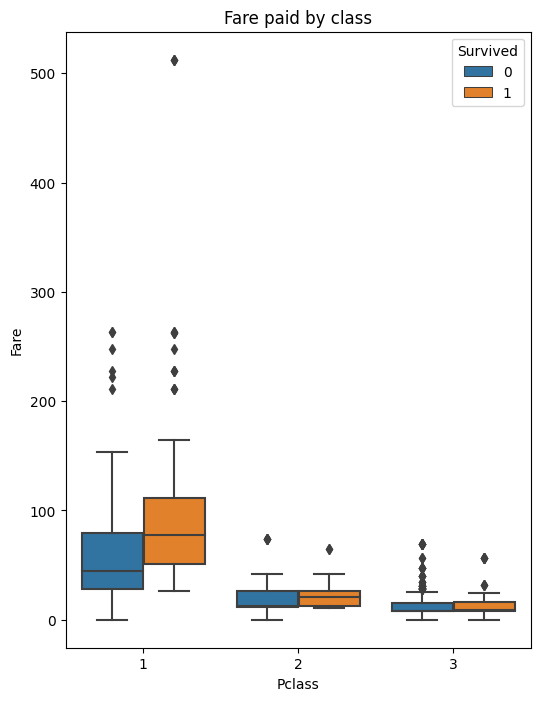

In [52]:
plt.figure(figsize=(6,8))
plt.title("Fare paid by class")
sns.boxplot(data=df_train, x='Pclass', y='Fare', hue='Survived')

Como podemos observar, a divisão por tarifa/valor da passagem está correlacionada intimamente com a classe que o passageiro ocupa, sendo assim, manteremos somente a feature pclass.

In [53]:
df_train = df_train.drop(['Fare'], axis=1)
df_test = df_test.drop(['Fare'], axis=1)
df_all = [df_train, df_test]

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,Family_Size,CategoricalAge,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,S,2,"(20.0, 22.0]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C,2,"(35.0, 39.0]",1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,S,1,"(24.0, 27.0]",0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S,2,"(32.0, 35.0]",1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,S,1,"(32.0, 35.0]",0


# Preparando os dados

### Tratando dados faltantes

In [56]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Title'] == 'Miss')]

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,Family_Size,CategoricalAge,HasCabin,Title
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,Q,1,NaN,0,Miss
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,Q,1,NaN,0,Miss
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,Q,1,NaN,0,Miss
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,Q,1,NaN,0,Miss
109,110,1,3,"Moran, Miss. Bertha",female,NaN,Q,2,NaN,0,Miss
128,129,1,3,"Peter, Miss. Anna",female,NaN,C,3,NaN,1,Miss
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,S,11,NaN,0,Miss
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,Q,1,NaN,0,Miss
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,S,5,NaN,0,Miss
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,S,1,NaN,0,Miss


In [57]:
for dataset in df_all:
    misses_id = dataset.loc[(dataset['Age'].isnull()) & (dataset['Title'] == 'Miss')]['PassengerId'].tolist()

    for i in misses_id:
        if rnd.random()  <= 0.16:
            dataset.loc[dataset['PassengerId'] == i, 'IsKid'] = 1

df_train.loc[(df_train['Age'].isnull()) & (df_train['Title'] == 'Miss')]

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,Family_Size,CategoricalAge,HasCabin,Title,IsKid
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,Q,1,NaN,0,Miss,NaN
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,Q,1,NaN,0,Miss,NaN
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,Q,1,NaN,0,Miss,NaN
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,Q,1,NaN,0,Miss,NaN
109,110,1,3,"Moran, Miss. Bertha",female,NaN,Q,2,NaN,0,Miss,NaN
128,129,1,3,"Peter, Miss. Anna",female,NaN,C,3,NaN,1,Miss,NaN
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,S,11,NaN,0,Miss,NaN
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,Q,1,NaN,0,Miss,NaN
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,S,5,NaN,0,Miss,NaN
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,S,1,NaN,0,Miss,NaN


In [58]:
# Transformando o sexo dos passageiros em binário (mulher:0 e homem:1)
for dataset in df_all:
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,Family_Size,CategoricalAge,HasCabin,Title,IsKid
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,S,2,"(20.0, 22.0]",0,Mr,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,C,2,"(35.0, 39.0]",1,Mrs,NaN
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,S,1,"(24.0, 27.0]",0,Miss,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,S,2,"(32.0, 35.0]",1,Mrs,NaN
4,5,0,3,"Allen, Mr. William Henry",1,35.0,S,1,"(32.0, 35.0]",0,Mr,NaN


In [59]:
freq_port = df_train.Embarked.dropna().mode()[0]

for dataset in df_all:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,Family_Size,CategoricalAge,HasCabin,Title,IsKid
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,S,2,"(20.0, 22.0]",0,Mr,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,C,2,"(35.0, 39.0]",1,Mrs,NaN
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,S,1,"(24.0, 27.0]",0,Miss,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,S,2,"(32.0, 35.0]",1,Mrs,NaN
4,5,0,3,"Allen, Mr. William Henry",1,35.0,S,1,"(32.0, 35.0]",0,Mr,NaN


## Dropping features que não servirão para nossa predição

In [62]:
df_train = df_train.drop(['Name', 'PassengerId', 'Age', 'CategoricalAge', 'Title', 'Embarked', 'HasCabin'], axis=1)
df_test = df_test.drop(['Name', 'Age', 'CategoricalAge', 'Title', 'Embarked', 'HasCabin'], axis=1)
df_all = [df_train, df_test]
df_train.shape, df_test.shape

((891, 5), (418, 4))

In [63]:
df_train.head()

,Survived,Pclass,Sex,Family_Size,IsKid
0,0,3,1,2,NaN
1,1,1,0,2,NaN
2,1,3,0,1,NaN
3,1,1,0,2,NaN
4,0,3,1,1,NaN


In [64]:
df_test.head()

,PassengerId,Pclass,Sex,Family_Size
0,892,3,1,1
1,893,3,0,2
2,894,2,1,1
3,895,3,1,1
4,896,3,0,3
